In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from doepy import build
import pandas as pd

Attempt #1: follow grid from meeting

```
Minimum: 

lambda > 4t >800um 

T=200um, lambda = 1mm 

 

Maximum: 

Upper limit 

 

Wavelength =  

30mm 

20mm 

10 

5 

 

Thickness= 

200um 

400um 

800um 

1000um 

 

Total shape= 

180mm height 

120mm width 

 

Height = 6*wavelength 

Width = 4*wavelength 
```

In [2]:
lambdas = [5, 10, 20, 30]
thicknesses = [0.2, 0.4, 0.6, 0.8, 1]
shape_xyz = [120, 120, 180]
#min height = 6*lambda
#min width = 4*lambda

In [3]:
import itertools as itt

samples0 = pd.DataFrame(list(itt.product(lambdas, thicknesses)), columns=['lambda', 'thickness'])
samples0

,lambda,thickness
0,5,0.2
1,5,0.4
2,5,0.6
3,5,0.8
4,5,1.0
5,10,0.2
6,10,0.4
7,10,0.6
8,10,0.8
9,10,1.0


In [4]:
from spartantpms.tpms.gyroid import sheet_gyroid_function
from spartantpms.tpms.utils import get_porosity
from sdf import box

def sheet_porosity(lambda_xyz, thickness):
    f = sheet_gyroid_function(lambda_x=lambda_xyz, lambda_y=lambda_xyz, lambda_z=lambda_xyz, sheet_thickness=thickness)
    
    f = f & box((lambda_xyz, lambda_xyz, lambda_xyz)).translate((lambda_xyz/2, lambda_xyz/2, lambda_xyz/2))
    
    return get_porosity(f, mesh_ct=101, bounds = [[0,0,0],[lambda_xyz,lambda_xyz,lambda_xyz]])

sheet_porosity(5, 0.2)

0.9285344768179397

In [5]:
samples0["porosity"] = samples0.apply(lambda row: sheet_porosity(row["lambda"], row["thickness"]), axis=1)
samples0

,lambda,thickness,porosity
0,5,0.2,0.928534
1,5,0.4,0.846112
2,5,0.6,0.764885
3,5,0.8,0.691478
4,5,1.0,0.622659
5,10,0.2,0.965095
6,10,0.4,0.928534
7,10,0.6,0.883309
8,10,0.8,0.846112
9,10,1.0,0.808434


c:\Users\rkumar\AppData\Local\miniconda3\envs\tpms\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rkumar\AppData\Local\miniconda3\envs\tpms\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rkumar\AppData\Local\miniconda3\envs\tpms\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='lambda', ylabel='porosity'>

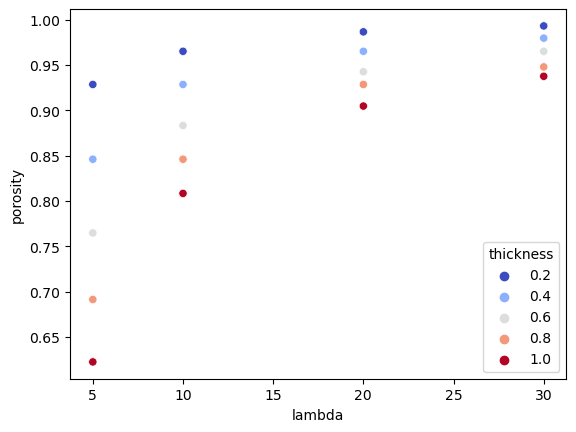

In [6]:
sns.scatterplot(
    data = samples0,
    x="lambda",
    y="porosity",
    hue="thickness",
    palette="coolwarm"
)

Attempt #2 -- control porosity, lambda, let thickness float

In [7]:
porosities = [0.95, 0.9, 0.85, 0.8]
thicknesses = [0.2, 0.4, 0.6, 0.8, 1.0]

samples = pd.DataFrame(list(itt.product(porosities, thicknesses)), columns=['porosity', 'thickness'])
samples.head()

,porosity,thickness
0,0.95,0.2
1,0.95,0.4
2,0.95,0.6
3,0.95,0.8
4,0.95,1.0


In [8]:
from spartantpms.tpms.gyroid import sheet_gyroid_function, _gyroid_porosity_to_t_value, _sheet_thickness_to_t_value
from scipy.optimize import minimize_scalar

def sheet_lambda(porosity, thickness):
    f = lambda lambda_xyz: abs(sheet_porosity(lambda_xyz, thickness) - porosity)
    
    res = minimize_scalar(f, bounds=(0.1, thickness/0.004), method='bounded', options = dict(maxiter=10))
    return res.x

sheet_lambda(0.95, 0.2)


7.795012066490881

In [9]:
samples["lambda"] = samples.apply(lambda row: sheet_lambda(row["porosity"], row["thickness"]), axis=1)
samples

,porosity,thickness,lambda
0,0.95,0.2,7.795012
1,0.95,0.4,15.634872
2,0.95,0.6,23.532094
3,0.95,0.8,31.372580
4,0.95,1.0,38.666430
5,0.90,0.2,3.929099
6,0.90,0.4,7.843246
7,0.90,0.6,11.752850
8,0.90,0.8,15.664635
9,0.90,1.0,19.581967


c:\Users\rkumar\AppData\Local\miniconda3\envs\tpms\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rkumar\AppData\Local\miniconda3\envs\tpms\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rkumar\AppData\Local\miniconda3\envs\tpms\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='lambda', ylabel='porosity'>

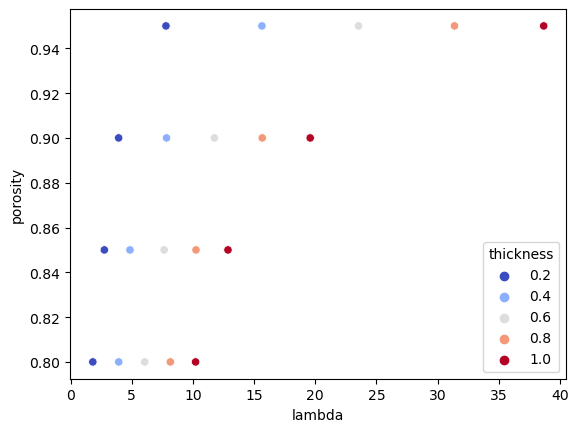

In [10]:
sns.scatterplot(
    data = samples,
    x="lambda",
    y="porosity",
    hue="thickness",
    palette="coolwarm"
)

In [11]:
samples.round(3).to_csv("20240213 Sheet Samples with Lambda Driven.csv")
samples0.round(3).to_csv("20240213 Sheet Samples with Porosity Driven.csv")

In [14]:
samples

,porosity,thickness,lambda
0,0.95,0.2,7.795012
1,0.95,0.4,15.634872
2,0.95,0.6,23.532094
3,0.95,0.8,31.372580
4,0.95,1.0,38.666430
5,0.90,0.2,3.929099
6,0.90,0.4,7.843246
7,0.90,0.6,11.752850
8,0.90,0.8,15.664635
9,0.90,1.0,19.581967


generate STLs to test SLA printer

In [10]:
def structure_from_row(row, box_size = None):
    f = sheet_gyroid_function(lambda_x=row["lambda"], lambda_y=row["lambda"], lambda_z=row["lambda"], sheet_thickness=row["thickness"])
    
    if box_size is None:
        box_size = row["lambda"] * 2
    f = f & box(box_size)
    return f



# structure_from_row(samples.iloc[0]).save("sheets_0.95porosity_0.2thickness.stl", sparse=False, samples=2**24)
# structure_from_row(samples.iloc[4]).save("sheets_0.95porosity_1.0thickness.stl", sparse=False, samples=2**24)

# structure_from_row(samples.iloc[15]).save("sheets_0.8porosity_0.2thickness.stl", sparse=False, samples=2**24)
# structure_from_row(samples.iloc[19]).save("sheets_0.8porosity_1.0thickness.stl", sparse=False, samples=2**24)


# structure_from_row(samples.iloc[0], box_size=(120,120,180))\
#     .save("sheets_0.95porosity_0.2thickness_120120180.stl", sparse=False, samples=2**24)
    
    
box_size = (25.4, 25.4, 25.4)
# structure_from_row(samples.iloc[0], box_size=box_size)\
#     .save("sheets_0.95porosity_0.2thickness_1inch.stl", sparse=False, samples=2**24)
    
structure_from_row(samples.iloc[4], box_size=box_size)\
    .save("sheets_0.95porosity_1thickness_1inch.stl", sparse=False, samples=2**24)
    
structure_from_row(samples.iloc[15], box_size=box_size)\
    .save("sheets_0.8porosity_0.2thickness_1inch.stl", sparse=False, samples=2**24)
    
structure_from_row(samples.iloc[19], box_size=box_size)\
    .save("sheets_0.8porosity_1thickness_1inch.stl", sparse=False, samples=2**24)

min -13.5269, -13.5269, -13.5269
max 13.5269, 13.5269, 13.5269
step 0.105679, 0.105679, 0.105679
18191447 samples in 512 batches with 20 workers
  100% (512 of 512) [##############################] 0:00:02 0:00:00    
0 skipped, 280 empty, 232 nonempty
784656 triangles in 2.39561 seconds
min -13.5269, -13.5269, -13.5269
max 13.5269, 13.5269, 13.5269
step 0.105679, 0.105679, 0.105679
18191447 samples in 512 batches with 20 workers
  100% (512 of 512) [##############################] 0:00:28 0:00:00    
0 skipped, 0 empty, 512 nonempty
15607658 triangles in 27.6806 seconds


c:\Users\rkumar\AppData\Local\miniconda3\envs\tpms\Lib\site-packages\sdf\stl.py:9: RuntimeWarning: invalid value encountered in divide
  normals /= np.linalg.norm(normals, axis=1).reshape((-1, 1))


min -13.5269, -13.5269, -13.5269
max 13.5269, 13.5269, 13.5269
step 0.105679, 0.105679, 0.105679
18191447 samples in 512 batches with 20 workers
  100% (512 of 512) [##############################] 0:00:10 0:00:00    
0 skipped, 0 empty, 512 nonempty
2867440 triangles in 9.86371 seconds


---

# Generate the STL files for the initial 25 structures

This can take some time to run. We use the same initial 25 parameters for both diamond and gyroid structures, yielding a total of 50 structures (25 for each class of TPMS).

In [2]:
from spartantpms.tpms.gyroid import sheet_gyroid_function
from spartantpms import generate_stl

from sdf import box
import pandas as pd
import os

In [6]:
samples = pd.read_csv("20240213 Sheet Samples with Lambda Driven.csv", index_col=0)
samples.head()

,porosity,thickness,lambda
0,0.95,0.2,7.795
1,0.95,0.4,15.635
2,0.95,0.6,23.532
3,0.95,0.8,31.373
4,0.95,1.0,38.666


In [7]:
from tqdm.notebook import tqdm

FOLDER = "initial 25 sheet structures"



try:
    os.mkdir(FOLDER)
except:
    print("Folder already exists")
    
for structure_number, row in tqdm(samples.iterrows(), total=len(samples)):
    f = sheet_gyroid_function(
        lambda_x = row["lambda"],
        lambda_y = row["lambda"],
        lambda_z= row["lambda"],
        theta_x=0,
        theta_y=0,
        theta_z=0, #rotation about z is degenerate when stressing along z axis.
        porosity=row["porosity"],
    )
    
    f = f & box(row["lambda"])
    
    generate_stl(
        f=f,
        fpath=f"{structure_number}_sheet_oneunitcell_{row['porosity']}porosity_{row['thickness']}sheetthickness.stl",
        step=row["thickness"]/6,
    )

Folder already exists


  0%|          | 0/20 [00:00<?, ?it/s]

NameError: name 'generate_stl' is not defined